In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_confusion_matrix

# Data Preparation

In [2]:
df_train = pd.read_csv('train_data.csv') 
df_test = pd.read_csv('test_data.csv')

In [3]:

df_train = df_train.drop(columns=[
     'rating', 'originalTitle', 
])

df_test = df_test.drop(columns=[
     'rating', 'originalTitle', 
])

In [4]:
X_train = df_train.drop(columns=["averageRating"])
y_train = df_train["averageRating"]
X_test = df_test.drop(columns=["averageRating"])
y_test = df_test["averageRating"]

In [5]:
X_train.shape

(103679, 21)

# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [6]:
# !pip install xgboost

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
clf = GradientBoostingRegressor(
                    n_estimators=500,
                    max_depth = 5,
                    learning_rate = 0.2,
                    min_samples_split= 5
                  
                  
                   )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 score: 0.3640988401645343
Mean Squared Error: 1.1592596913969295
Mean Absolute Error: 0.7856359825471008


In [9]:
import shap
shap.initjs()

In [10]:
# Get predictions for first observation
clf.predict(X_test)[0]

6.483298789485283

In [11]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X_test)

print(shap_values.shape)

(44435, 21)


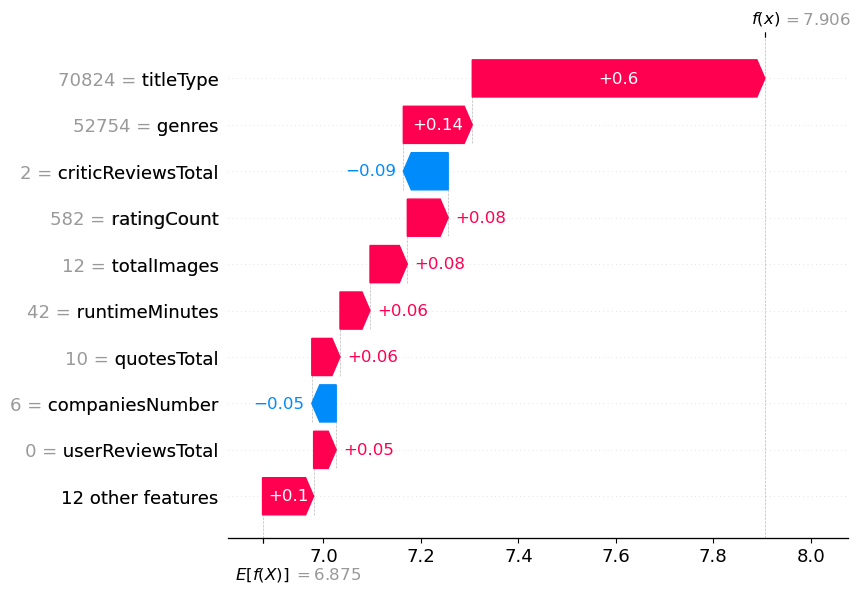

In [24]:
shap.plots.waterfall(shap_values[9000])

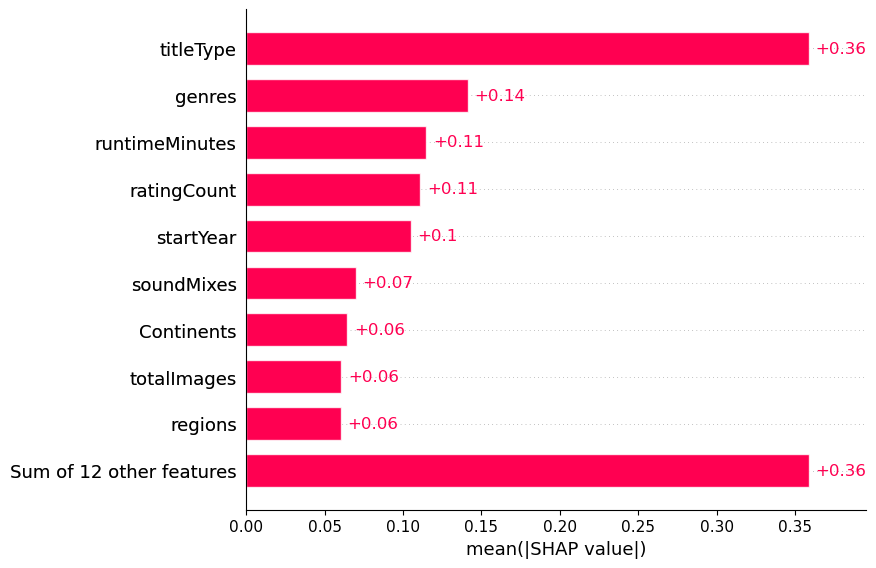

In [18]:
# mean SHAP
shap.plots.bar(shap_values, max_display=10)

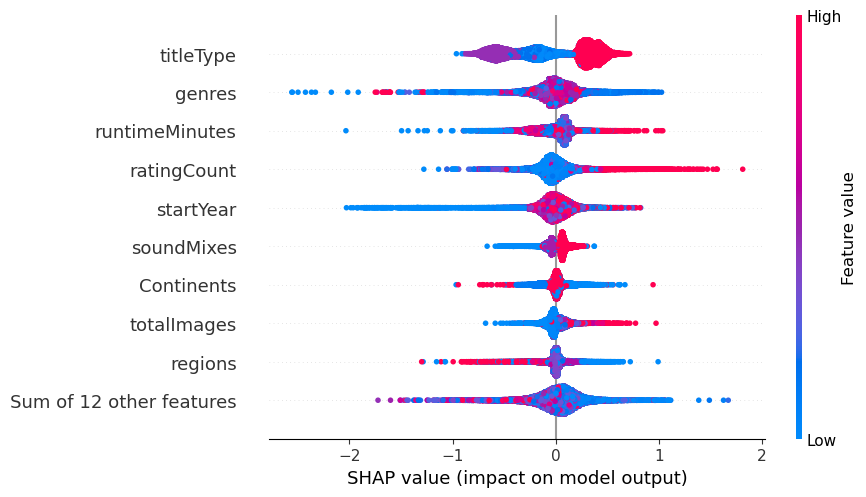

In [15]:
# beeswarm plot
shap.plots.beeswarm(shap_values)